In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "DOGEUSDT_15m_1h-pump05_190705_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2019-07-05 12:00:00,0.004490,0.004600,0.003760,0.003870,615633795.0,4089.0,232551781.0,975265.392673,0,...,NaN,0.607055,0.217054,0.377744,NaN,NaN,NaN,-0.244513,NaN,0.172414
1,2019-07-05 12:15:00,0.003861,0.003964,0.003763,0.003810,195552992.0,1302.0,90157312.0,351233.850182,0,...,NaN,0.855418,0.052882,0.461038,NaN,NaN,NaN,-0.077924,NaN,0.172414
2,2019-07-05 12:30:00,0.003823,0.003920,0.003782,0.003868,74692516.0,660.0,47002443.0,182350.877853,0,...,NaN,1.697447,0.035572,0.629279,NaN,NaN,NaN,0.258558,NaN,0.172414
3,2019-07-05 12:45:00,0.003894,0.003925,0.003869,0.003925,63551421.0,436.0,36033969.0,140462.253832,0,...,NaN,1.309495,0.014140,0.567005,NaN,NaN,NaN,0.134010,NaN,0.172414
4,2019-07-05 13:00:00,0.003915,0.003928,0.003815,0.003857,43064963.0,450.0,20889889.0,81304.664635,0,...,NaN,0.942044,0.029527,0.485079,NaN,NaN,NaN,-0.029843,NaN,0.172414


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "DOGEUSDT"
start_date = "2019-07-05"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close       volume  num_trades  \
 0       0.004490  0.004600  0.003760  0.003870  615633795.0      4089.0   
 1       0.003861  0.003964  0.003763  0.003810  195552992.0      1302.0   
 2       0.003823  0.003920  0.003782  0.003868   74692516.0       660.0   
 3       0.003894  0.003925  0.003869  0.003925   63551421.0       436.0   
 4       0.003915  0.003928  0.003815  0.003857   43064963.0       450.0   
 ...          ...       ...       ...       ...          ...         ...   
 195297  0.333580  0.333630  0.331900  0.332080    3405184.0      4671.0   
 195298  0.332080  0.333480  0.331890  0.332670    3992618.0      9534.0   
 195299  0.332660  0.333530  0.332590  0.332970    1169975.0      4439.0   
 195300  0.332980  0.333030  0.332100  0.332270    3863344.0      4299.0   
 195301  0.332260  0.332260  0.331110  0.331530    5045338.0      7289.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0         

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8482


np.float64(0.8481798340141485)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8482
AUC-ROC Score: 0.9699

Overall Metrics:
Accuracy:  0.9160
Precision: 0.9201
Recall:    0.9160
F1-Score:  0.9082

Class 0 Metrics:
Precision: 0.9092
Recall:    0.9944
F1-Score:  0.9499

Class 1 Metrics:
Precision: 0.9638
Recall:    0.6017
F1-Score:  0.7409

Using raw probabilities
Classification threshold: 0.8482
{'accuracy': 0.9160013884068032, 'precision': 0.9200941612397262, 'recall': 0.9160013884068032, 'f1': 0.9081674947336674, 'auc_roc': np.float64(0.9699008258229947), 'optimal_threshold': np.float64(0.8481798340141485), 'precision_0': 0.9091990483743061, 'recall_0': 0.9943625325238509, 'f1_0': 0.9498757249378624, 'precision_1': 0.9637883008356546, 'recall_1': 0.6017391304347826, 'f1_1': 0.7408993576017131}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 2.21% of total SHAP value magnitude
Top 20 features explain 91.07% of total SHAP value magnitude
Ratio (Top/Bottom): 41.27x


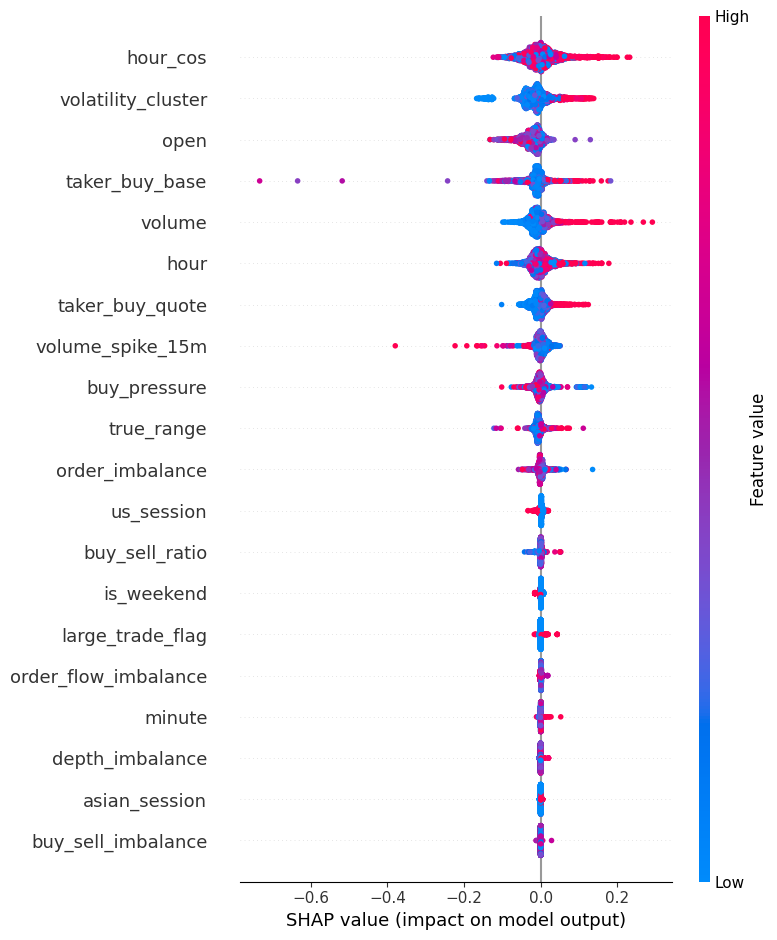

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 6.36% of total importance
Top 20 features explain 76.60% of total importance
Ratio (Top/Bottom): 12.05x


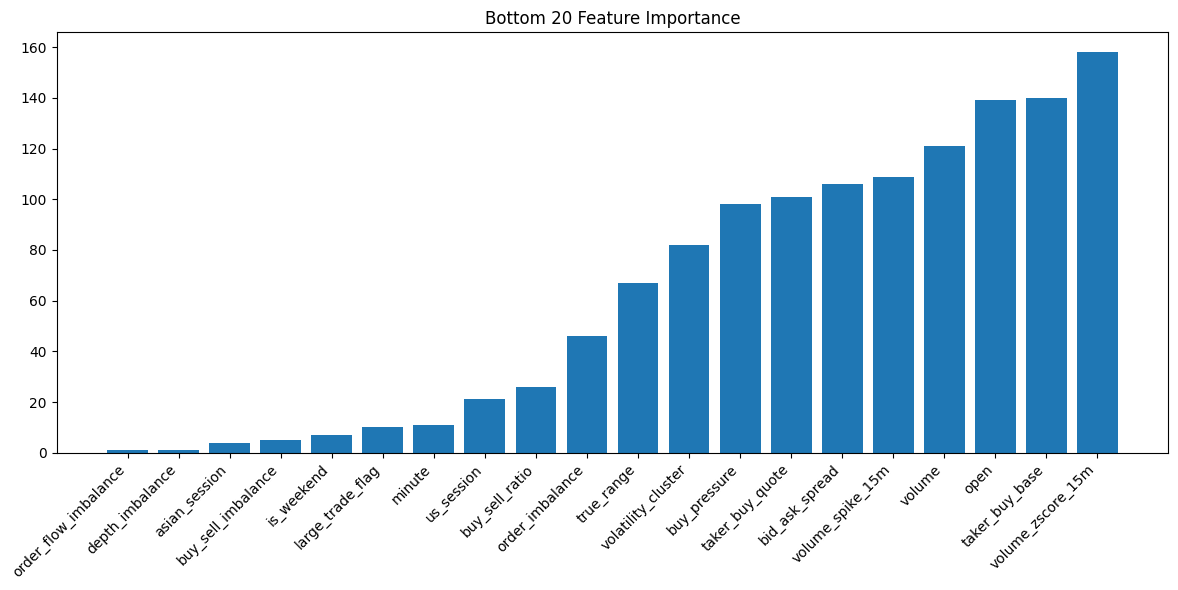

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()